In [39]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline
import datetime as dt

In [40]:
###Helper functions

#function to convert all account balance values to naira
def switch_ccy(col):
    CCY = col[0]
    ACY_AVL_BAL = col[1]
    
    if ACY_AVL_BAL>=-10000000000:
        if CCY == 'GBP':
            return ACY_AVL_BAL*479.79
        elif CCY == 'USD':
            return ACY_AVL_BAL*386.57
        elif CCY == 'EUR':
            return ACY_AVL_BAL*417.97
        else:
            return ACY_AVL_BAL


    
##function to rate customers based on account balance

def balance_rating(col):

    
    if col<=0:
        rating = 0
    elif col<=1000:
        rating = 4
    elif col<=5000:
        rating = 5
    elif col<=10000:
        rating = 6
    elif col<=50000:
        rating = 6
    elif col<=100000:
        rating = 7
    elif col<=500000:
        rating = 8
    elif col<=1000000:
        rating = 9
    else:
        rating = 10
    
    return rating


def debt_rating(col):

    
    if col<=0:
        rating = 10
    elif col<=1000:
        rating = 9
    elif col<=5000:
        rating = 8
    elif col<=10000:
        rating = 7
    elif col<=50000:
        rating = 6
    elif col<=100000:
        rating = 6
    elif col<=500000:
        rating = 5
    elif col<=1000000:
        rating = 4
    elif col<=10000000:
        rating = 2
    else:
        rating = 0
    
    return rating




def invest_rating(col):

    
    if col<=0:
        rating = 0
    elif col<=1000:
        rating = 2
    elif col<=5000:
        rating = 3
    elif col<=10000:
        rating = 4
    elif col<=50000:
        rating = 5
    elif col<=100000:
        rating = 6
    elif col<=500000:
        rating = 6
    elif col<=1000000:
        rating = 7
    elif col<=5000000:
        rating = 8
    elif col<=10000000:
        rating = 9
    else:
        rating = 10
    
    return rating





def roi_rating(col):

    
    if col<=0:
        rating = 0
    elif col<=10000:
        rating = 2
    elif col<=50000:
        rating = 3
    elif col<=100000:
        rating = 5
    elif col<=500000:
        rating = 5.5
    elif col<=1000000:
        rating = 6
    elif col<=5000000:
        rating = 7
    elif col<=1000000:
        rating = 8
    elif col<=5000000:
        rating = 9
    elif col<=10000000:
        rating = 9.5
    else:
        rating = 10
    
    return rating


def tenure_rating(col):
    
    if col<=0:
        rating = 0
    elif col<=50:
        rating = 1
    elif col<=100:
        rating = 2 
    elif col<=150:
        rating = 3
    elif col<=200:
        rating = 4
    elif col<=250:
        rating = 5
    elif col<=300:
        rating = 6
    elif col<=350:
        rating = 7
    elif col<=400:
        rating = 8
    elif col<=450:
        rating = 9
    else:
        rating = 10
    
    return abs(rating)


    

***Engineering the Accounts table to extract features for rating the customers' current account balances.

In [41]:
#### Reading the all_accounts table into Python
all_accounts = pd.read_csv('all_accounts.csv')

In [42]:
all_accounts.head()

,CUSTOMER_UNIQUE_ID,MASKED_ACCOUNT,RECORD_STAT,ACY_AVL_BAL,CCY
0,69090004,00******87,O,625.00,GBP
1,69090004,08******25,O,0.00,NGN
2,69090004,07******90,C,0.00,USD
3,69090004,00******24,O,245.16,USD
4,69090004,00******12,O,1262799.23,NGN


In [43]:
#create a new column in the dataframe and apply the switch_ccy function to convert all balances to naira
all_accounts['converted_bal'] = all_accounts[['CCY', 'ACY_AVL_BAL']].apply(switch_ccy, axis = 1)

In [44]:
all_accounts.head()

,CUSTOMER_UNIQUE_ID,MASKED_ACCOUNT,RECORD_STAT,ACY_AVL_BAL,CCY,converted_bal
0,69090004,00******87,O,625.00,GBP,2.998688e+05
1,69090004,08******25,O,0.00,NGN,0.000000e+00
2,69090004,07******90,C,0.00,USD,0.000000e+00
3,69090004,00******24,O,245.16,USD,9.477150e+04
4,69090004,00******12,O,1262799.23,NGN,1.262799e+06


In [45]:
#Add all the account balances for each customer and get their net balance with the bank
all_accounts_sorted = all_accounts.groupby('CUSTOMER_UNIQUE_ID').sum()
all_accounts_sorted

,ACY_AVL_BAL,converted_bal
CUSTOMER_UNIQUE_ID,,
56000,136043.48,1.360435e+05
62005,1531800.95,1.542308e+06
104008,12364.06,1.236406e+04
175007,20029.55,2.002955e+04
200006,61489.56,6.148956e+04
...,...,...
999737005,480.96,4.809600e+02
999823007,0.71,7.100000e-01
999881002,0.00,0.000000e+00


In [46]:
all_accounts_sorted['rated_bal'] = all_accounts_sorted['converted_bal'].apply(balance_rating)

In [47]:
#convert all_accounts_sorted from a pandas series to a dataframe
all_accounts_sorted_DF = pd.DataFrame(all_accounts_sorted)
all_accounts_sorted_DF

,ACY_AVL_BAL,converted_bal,rated_bal
CUSTOMER_UNIQUE_ID,,,
56000,136043.48,1.360435e+05,8
62005,1531800.95,1.542308e+06,10
104008,12364.06,1.236406e+04,6
175007,20029.55,2.002955e+04,6
200006,61489.56,6.148956e+04,7
...,...,...,...
999737005,480.96,4.809600e+02,4
999823007,0.71,7.100000e-01,4
999881002,0.00,0.000000e+00,0


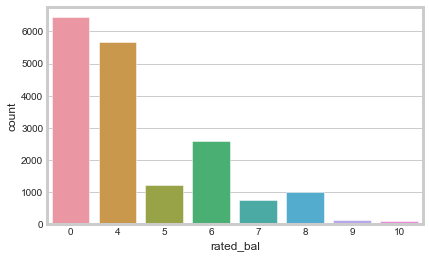

In [48]:
sns.set_style('whitegrid')
sns.countplot(data= all_accounts_sorted_DF, x='rated_bal') #explore target variables

###
Most of the customers have an account balance of between 0 and 1000 naira followed by people in the 50000 and 100000 showing that most customers are in the middle to lower class economic brackets
###

In [49]:
print('The shape of the all_accounts_sorted df is {}'.format(all_accounts_sorted_DF.shape))

The shape of the all_accounts_sorted df is (17975, 3)


In [50]:
AccountsRating = all_accounts_sorted_DF[['rated_bal']]
AccountsRating

,rated_bal
CUSTOMER_UNIQUE_ID,
56000,8
62005,10
104008,6
175007,6
200006,7
...,...
999737005,4
999823007,4
999881002,0


***Engineering the Balances data table to extract features for rating the customers' previous account balances overtime, the mean and the maximum balances and their ratings out of 10.

In [51]:
balances = pd.read_csv('all_balances.csv')

In [52]:
#AGGREGATE THE ACCOUNT BALANCES BY MEAN
mean_balance = balances.groupby('CUSTOMER_UNIQUE_ID').mean()

In [53]:
mean_balance.columns = ['mean_balance']
Rated_bal_DF = pd.DataFrame(mean_balance)

In [54]:
#DO THE SAME FOR MAXIMUM BALANCE AND THE SUM OF THE BALANCES IN THE ACCOUNT OF EACH CUSTOMER
Rated_bal_DF['max_balance']=balances.groupby('CUSTOMER_UNIQUE_ID').max()['BAL']
Rated_bal_DF['balance_history']=balances.groupby('CUSTOMER_UNIQUE_ID').sum()['BAL']
Rated_bal_DF['mean_balance_rated'] = Rated_bal_DF['mean_balance'].apply(balance_rating) #APPLY THE RATING FUNCTION TO RATE EACH BALANCE
Rated_bal_DF['max_balance_rated'] = Rated_bal_DF['max_balance'].apply(balance_rating)
Rated_bal_DF['balance_history_rated'] = Rated_bal_DF['balance_history'].apply(balance_rating)

In [55]:
Rated_bal_DF

,mean_balance,max_balance,balance_history,mean_balance_rated,max_balance_rated,balance_history_rated
CUSTOMER_UNIQUE_ID,,,,,,
56000,38235.144444,145043.48,688232.60,6,8,9
62005,134025.795848,2000405.57,22918411.09,8,10,10
104008,46854.546618,446593.07,6372218.34,6,8,10
175007,107008.290792,500015.62,10807837.37,8,9,10
200006,33340.945385,116805.33,1733729.16,6,8,10
...,...,...,...,...,...,...
999737005,4013.467042,16736.96,284956.16,5,6,8
999823007,7912.571071,27964.59,664655.97,6,6,9
999881002,38413.173158,234513.31,2189550.87,6,8,10


In [57]:
BalanceRating = Rated_bal_DF[['mean_balance_rated', 'max_balance_rated', 'balance_history_rated']]
BalanceRating.head(1)

,mean_balance_rated,max_balance_rated,balance_history_rated
CUSTOMER_UNIQUE_ID,,,
56000,6,8,9


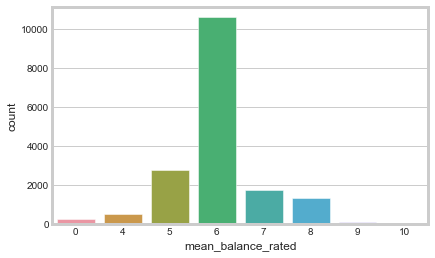

In [59]:
sns.set_style('whitegrid')
sns.countplot(data= BalanceRating, x='mean_balance_rated') #explore target variables


***Engineering the Transactions data table to extract features for rating the transaction history of all customers and to have an idea of the net cash flow in and out of their accounts.

In [60]:
trans = pd.read_csv('all_transactions_digital.csv')

In [61]:
trans.head()

,CUSTOMER_UNIQUE_ID,MASKED_ACCT,TRN_REF_NO,AC_CCY,DRCR_IND,TRN_CODE,FCY_AMOUNT,EXCH_RATE,LCY_AMOUNT,TRN_DT
0,639103002,00******23,133ICEBNGN 00002,NGN,C,CIN,NaN,NaN,0.01,2019-09-30 00:00:00
1,563391007,00******98,0981356192730075,NGN,D,CWR,NaN,NaN,2000.00,2019-09-30 00:00:00
2,563391007,00******98,098AWRI801180wJs,NGN,D,CWR,NaN,NaN,2000.00,2019-09-30 00:00:00
3,563391007,00******98,098AWRI801180wKb,NGN,D,CWR,NaN,NaN,2000.00,2019-09-30 00:00:00
4,563391007,00******98,098AWRI801180dLN,NGN,D,CWR,NaN,NaN,2000.00,2019-09-30 00:00:00


In [62]:
#SELECT USEFUL COLUMNS ONLY
new_trans = trans[['CUSTOMER_UNIQUE_ID', 'AC_CCY', 'LCY_AMOUNT', 'DRCR_IND']]

In [63]:
#Convert the transaction balances in LCY_AMOUNT to naira using the switch_ccy function
new_trans['Naira_LCY_AMOUNT'] = new_trans[['AC_CCY', 'LCY_AMOUNT']].apply(switch_ccy, axis = 1)

In [64]:
#group by customer_uniuqe_id and debit or credit
new_trans_try = new_trans.groupby(['CUSTOMER_UNIQUE_ID','DRCR_IND']).sum()

In [65]:
#create a dataframe from the groupby object
new_trans_DF= pd.DataFrame(new_trans_try)

In [66]:
new_trans_DF.drop('LCY_AMOUNT', axis = 1)

Naira_LCY_AMOUNT
CUSTOMER_UNIQUE_ID DRCR_IND                  
56000              C             3.101874e+06
                   D             2.956830e+06
62005              C             9.572054e+06
                   D             8.005584e+06
104008             C             5.804516e+06
...                                       ...
999881002          D             3.492407e+06
999943009          C             8.453925e+05
                   D             8.496956e+05
999944001          C             3.619596e+05
                   D             3.744245e+05

[35568 rows x 1 columns]

In [67]:
new_trans_DF_clone = new_trans_DF

In [68]:
new_trans_DF_clone.reset_index(inplace = True)

In [69]:
#This forloop subtracts the debit from credit for each customer to get the net cash flow. It also calculates the total credits and total debits
net_cash = []
total_credit=[]
total_debit=[]
CUSTOMER_UNIQUE_ID=[]
for j in new_trans_DF_clone.index:
    if j%2!=0:
        total_debit.append(new_trans_DF_clone.iloc[j]['Naira_LCY_AMOUNT'])
        total_credit.append(new_trans_DF_clone.iloc[j-1]['Naira_LCY_AMOUNT'])
        net_cash.append(new_trans_DF_clone.iloc[j-1]['Naira_LCY_AMOUNT'] - new_trans_DF_clone.iloc[j]['Naira_LCY_AMOUNT'])
        CUSTOMER_UNIQUE_ID.append(new_trans_DF_clone.iloc[j]['CUSTOMER_UNIQUE_ID'])

In [70]:
#Convert the lists to series and concatenate them into a dataframe
CUSTOMER_UNIQUE_ID = pd.Series(CUSTOMER_UNIQUE_ID)
total_debit = pd.Series(total_debit)
total_credit = pd.Series(total_credit)
net_cash = pd.Series(net_cash)

Cashflow_DF = pd.concat([CUSTOMER_UNIQUE_ID, total_debit, total_credit, net_cash], axis =1)
Cashflow_DF.columns = ['CUSTOMER_UNIQUE_ID', 'total_debit', 'total_credit', 'net_cash']#set column names


In [71]:
Cashflow_DF

,CUSTOMER_UNIQUE_ID,total_debit,total_credit,net_cash
0,56000,2.956830e+06,3.101874e+06,1.450435e+05
1,62005,8.005584e+06,9.572054e+06,1.566470e+06
2,104008,5.809491e+06,5.804516e+06,-4.974960e+03
3,175007,1.390857e+06,1.417134e+06,2.627714e+04
4,200006,2.649034e+06,2.710016e+06,6.098221e+04
...,...,...,...,...
17779,999737005,1.802696e+05,1.807006e+05,4.310600e+02
17780,999823007,8.222580e+05,7.866945e+05,-3.556350e+04
17781,999881002,3.492407e+06,3.308102e+06,-1.843050e+05
17782,999943009,8.496956e+05,8.453925e+05,-4.303060e+03


In [72]:
Cashflow_DF.set_index('CUSTOMER_UNIQUE_ID') #set index as customer_id

,total_debit,total_credit,net_cash
CUSTOMER_UNIQUE_ID,,,
56000,2.956830e+06,3.101874e+06,1.450435e+05
62005,8.005584e+06,9.572054e+06,1.566470e+06
104008,5.809491e+06,5.804516e+06,-4.974960e+03
175007,1.390857e+06,1.417134e+06,2.627714e+04
200006,2.649034e+06,2.710016e+06,6.098221e+04
...,...,...,...
999737005,1.802696e+05,1.807006e+05,4.310600e+02
999823007,8.222580e+05,7.866945e+05,-3.556350e+04
999881002,3.492407e+06,3.308102e+06,-1.843050e+05


In [73]:
## Applying the balance rating function to get the balance rating on the Cashflow dataframe

Cashflow_DF['net_cash_rating'] =Cashflow_DF.net_cash.apply(balance_rating)
Cashflow_DF

,CUSTOMER_UNIQUE_ID,total_debit,total_credit,net_cash,net_cash_rating
0,56000,2.956830e+06,3.101874e+06,1.450435e+05,8
1,62005,8.005584e+06,9.572054e+06,1.566470e+06,10
2,104008,5.809491e+06,5.804516e+06,-4.974960e+03,0
3,175007,1.390857e+06,1.417134e+06,2.627714e+04,6
4,200006,2.649034e+06,2.710016e+06,6.098221e+04,7
...,...,...,...,...,...
17779,999737005,1.802696e+05,1.807006e+05,4.310600e+02,4
17780,999823007,8.222580e+05,7.866945e+05,-3.556350e+04,0
17781,999881002,3.492407e+06,3.308102e+06,-1.843050e+05,0
17782,999943009,8.496956e+05,8.453925e+05,-4.303060e+03,0


In [74]:
## Taking out the needed columns
CashflowRating = Cashflow_DF[['CUSTOMER_UNIQUE_ID', 'net_cash_rating']]
CashflowRating

,CUSTOMER_UNIQUE_ID,net_cash_rating
0,56000,8
1,62005,10
2,104008,0
3,175007,6
4,200006,7
...,...,...
17779,999737005,4
17780,999823007,0
17781,999881002,0
17782,999943009,0


In [75]:
CashflowRating.set_index('CUSTOMER_UNIQUE_ID') #set index as customer_id

,net_cash_rating
CUSTOMER_UNIQUE_ID,
56000,8
62005,10
104008,0
175007,6
200006,7
...,...
999737005,4
999823007,0
999881002,0


***Working on the Bureau dataset to extract features to take a look at the net debt the customers owe and for rating their debt profile.

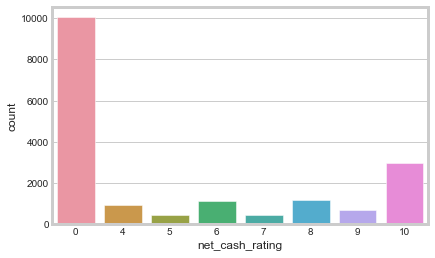

In [77]:
sns.set_style('whitegrid')
sns.countplot(data= CashflowRating, x = 'net_cash_rating') #explore target variables


In [78]:
bureau = pd.read_csv('bureau_score.csv')
bureau

,CUSTOMER_UNIQUE_ID,CUSTOMER_TYPE,BUREAU_SCORE,APPROVED_AMT,CPO,LOAN_CT,TOTAL_RENTALS,LOAN_CT_NON_DELQ,BAL_NON_DELQ,LOAN_CT_30DPD,BAL_30DPD,LOAN_CT_60DPD,BAL_60DPD,LOAN_CT_PL_90DPD,BAL_PL_90DPD
0,206713006,NaN,0,0.0,179.0,1,0.0,0,0.0,0,0.0,0,0,1,179.0
1,249434003,NaN,0,20000000.0,21200000.0,1,10800000.0,0,0.0,1,21200000.0,0,0,0,0.0
2,232404006,NaN,0,0.0,0.0,1,0.0,1,0.0,0,0.0,0,0,0,0.0
3,280412004,NaN,0,0.0,0.0,1,0.0,1,0.0,0,0.0,0,0,0,0.0
4,234003003,NaN,0,0.0,0.0,1,0.0,1,0.0,0,0.0,0,0,0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
879175,688861011,NaN,0,648900.0,644380.0,3,22227.0,3,644380.0,0,0.0,0,0,0,0.0
879176,688861011,NaN,0,0.0,10344455.0,1,10344455.0,0,0.0,0,0.0,0,0,1,10344455.0
879177,688861011,NaN,0,954143.0,580489.0,3,27277.0,2,43267.0,1,537222.0,0,0,0,0.0
879178,602343010,NaN,0,0.0,7341.0,1,500.0,0,0.0,0,0.0,0,0,1,7341.0


In [79]:
       ############     Summing up the 30days, 60days and the 90days balances
debtProfile=bureau[['CUSTOMER_UNIQUE_ID','BAL_30DPD', 'BAL_60DPD', 'BAL_PL_90DPD']]


In [80]:
debtProfile['TotalDebts'] = debtProfile.apply(lambda row: row.BAL_30DPD + row.BAL_60DPD + row.BAL_PL_90DPD, axis=1)

In [81]:
debtProfile = debtProfile.groupby("CUSTOMER_UNIQUE_ID").sum()

In [82]:
debtProfile['DebtRating'] = debtProfile['TotalDebts'].apply(debt_rating)

In [83]:
debtProfile = debtProfile[['DebtRating']]
debtProfile

,DebtRating
CUSTOMER_UNIQUE_ID,
1004,2
1008,5
6001,10
20004,10
62006,5
...,...
999911009,9
999934001,10
999942001,10


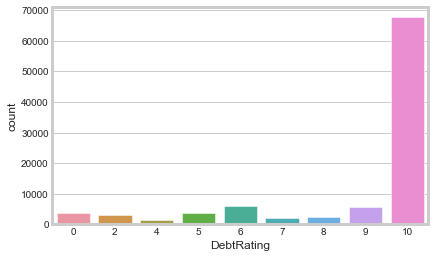

In [84]:
sns.set_style('whitegrid')
sns.countplot(data= debtProfile, x='DebtRating') #explore target variables


Most customers have a low debt rating

***Read in the Investment table. Here we can get to see the strength of the customers' investments and get to rate them too, out of 10.

In [85]:
                           ############   from the all investment table   ###########
investment = pd.read_csv('all_investments.csv')

In [86]:
## wrting customers id as a string
str(investment['CUSTOMER_UNIQUE_ID'])

'0       376921008\n1       637314002\n2       523013005\n3        18030000\n4       143966005\n          ...    \n1530    383381000\n1531    634723005\n1532       226008\n1533     69090004\n1534     36326009\nName: CUSTOMER_UNIQUE_ID, Length: 1535, dtype: int64'

In [87]:
investment['TotalInvestments']= investment[['CURRENCY', 'LCY_AMOUNT']].apply(switch_ccy, axis=1)

In [88]:
investment['ROI']= investment.apply(lambda row: row.TotalInvestments * row.MAIN_COMP_RATE, axis=1)

In [89]:
dfInvestment = investment[['CUSTOMER_UNIQUE_ID', 'TotalInvestments', 'ROI']]

In [90]:
dfInvestment['InvestmentRating'] = investment['TotalInvestments'].apply(invest_rating)

In [92]:
dfInvestment['ROIRating'] = investment['ROI'].apply(roi_rating)

In [93]:
Investment_DF= dfInvestment[['CUSTOMER_UNIQUE_ID','InvestmentRating', 'ROIRating']]

In [94]:
Investment_DF

,CUSTOMER_UNIQUE_ID,InvestmentRating,ROIRating
0,376921008,8,10.0
1,637314002,8,10.0
2,523013005,10,10.0
3,18030000,10,10.0
4,143966005,6,7.0
...,...,...,...
1530,383381000,8,9.5
1531,634723005,6,6.0
1532,226008,6,7.0
1533,69090004,10,10.0


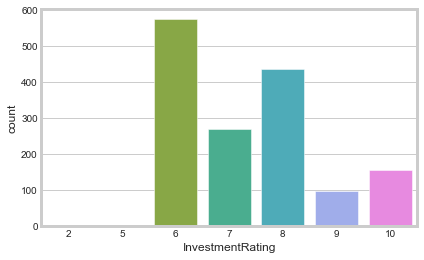

In [95]:
sns.set_style('whitegrid')
sns.countplot(data= Investment_DF, x='InvestmentRating') #explore target variables


***Read in the all_loans table. Here we want to rate all the previous loans of the customers which have been paid. Here we can get to see their how their Credit Profile based on previously completed loans look like.

In [96]:
loans = pd.read_csv('all_loans.csv')

In [97]:
loans['CURRENCY'].unique()

array(['NGN'], dtype=object)

In [98]:
loans.head(5)

,CUSTOMER_UNIQUE_ID,LOAN_REF,PRODUCT_CODE,PRODUCT_NAME,BOOK_DATE,MATURITY_DATE,AMOUNT_FINANCED,CURRENCY,ACCOUNT_STATUS,MASKED_ACCOUNT
0,705881005,099AMPC182150644,AMPC,ACCESS MONEY PAYDAY ADVANCE,8/3/2018,9/2/2018,7000.0,NGN,L,06******98
1,569019008,099AMPC183111412,AMPC,ACCESS MONEY PAYDAY ADVANCE,11/7/2018,12/7/2018,1000.0,NGN,L,00******48
2,340884012,099AMPC183111143,AMPC,ACCESS MONEY PAYDAY ADVANCE,11/7/2018,12/7/2018,10000.0,NGN,L,07******49
3,19400009,099AMPC183110916,AMPC,ACCESS MONEY PAYDAY ADVANCE,11/7/2018,12/7/2018,200000.0,NGN,L,00******53
4,83585009,099AMPC183110921,AMPC,ACCESS MONEY PAYDAY ADVANCE,11/7/2018,12/7/2018,14000.0,NGN,L,00******76


In [99]:
            ###     Converts the loan amount based on the currency     ###

loans['Amount'] = loans[['CURRENCY', 'AMOUNT_FINANCED']].apply(switch_ccy, axis=1)

In [100]:
            ###    Converts the dates into days of the year and find the difference between them     ###

loans['Book_Day'] = pd.to_datetime(loans['BOOK_DATE'])
loans['Mature_Day'] = pd.to_datetime(loans['MATURITY_DATE'])
loans['BookDay']= loans['Book_Day'].dt.dayofyear
loans['MatureDay'] = loans['Mature_Day'].dt.dayofyear
loans['Tenure'] = abs(loans['MatureDay'] - loans['BookDay'])

In [101]:
newLoans = loans.groupby("CUSTOMER_UNIQUE_ID").sum()
newLoans

,AMOUNT_FINANCED,Amount,BookDay,MatureDay,Tenure
CUSTOMER_UNIQUE_ID,,,,,
56000,1648000.00,1648000.00,5673,4353,2700
62005,1946000.00,1946000.00,5422,5137,1725
104008,2075000.00,2075000.00,7987,8692,2415
175007,89000.00,89000.00,3188,3698,510
200006,1199000.00,1199000.00,2415,2895,480
...,...,...,...,...,...
999737005,39500.00,39500.00,3463,3973,510
999823007,34000.00,34000.00,980,1100,120
999881002,685919.37,685919.37,1158,810,528


In [102]:
newLoans = newLoans[['Amount', 'Tenure']]

In [103]:
newLoans['AmountRating'] = newLoans["Amount"].apply(balance_rating)
newLoans['TenureRating'] = newLoans['Tenure'].apply(tenure_rating)
newLoans

,Amount,Tenure,AmountRating,TenureRating
CUSTOMER_UNIQUE_ID,,,,
56000,1648000.00,2700,10,10
62005,1946000.00,1725,10,10
104008,2075000.00,2415,10,10
175007,89000.00,510,7,10
200006,1199000.00,480,10,10
...,...,...,...,...
999737005,39500.00,510,6,10
999823007,34000.00,120,6,3
999881002,685919.37,528,9,10


In [104]:
CreditProfile = newLoans[['AmountRating', 'TenureRating' ]]
CreditProfile

,AmountRating,TenureRating
CUSTOMER_UNIQUE_ID,,
56000,10,10
62005,10,10
104008,10,10
175007,7,10
200006,10,10
...,...,...
999737005,6,10
999823007,6,3
999881002,9,10


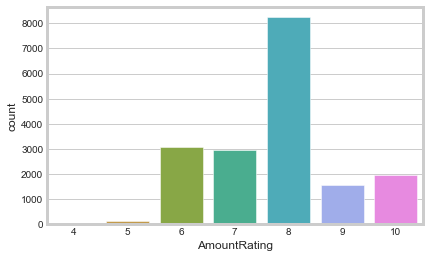

In [105]:
sns.set_style('whitegrid')
sns.countplot(data= CreditProfile, x='AmountRating') #explore target variables


***Loading the "all_loans_application" data set into python. Here we can get to see and rate all the current loans the customers are looking to access. The higher the amount, the more possible it is to get a high credit score.

In [106]:
loansApp = pd.read_csv('all_loans_application.csv')

In [107]:
loansApp.dropna() ### dropping rows with missin values

,CUSTOMER_UNIQUE_ID,OFFERID,INCR_ALLOWED,APPLIED_AMOUNT,DATE_OF_APPLY,APPLICATION_STATUS,MODULE,LOAN_CLASSIFICATION
0,562966000,099AMPC173040537,370803.43,1040.0,10/31/2017 10:36:23 AM,D,AMPC,PERFORMING
1,562966000,099AMPC173040537,370803.43,1040.0,10/31/2017 10:37:10 AM,D,AMPC,PERFORMING
2,562966000,099AMPC173040539,370803.43,1040.0,10/31/2017 10:39:06 AM,D,AMPC,PERFORMING
3,867156003,099AMPC173040543,15278.69,13000.0,10/31/2017 10:44:39 AM,D,AMPC,PERFORMING
4,747196003,099AMPC173040545,136863.90,1000.0,10/31/2017 10:44:58 AM,D,AMPC,PERFORMING
...,...,...,...,...,...,...,...,...
23167,212922009,099STPL19294000G,76659.00,389000.0,10/21/2019 6:03:09 PM,D,STP,PERFORMING
23168,422330002,099STPL1929403V3,33229.51,10000.0,10/21/2019 7:08:40 AM,D,STP,PERFORMING
23169,334578018,099STPL193010006,98616.43,400000.0,10/26/2019 9:44:13 AM,D,STP,PERFORMING
23170,440170019,099STPL19301000D,67800.03,344000.0,10/27/2019 11:34:56 AM,D,STP,PERFORMING


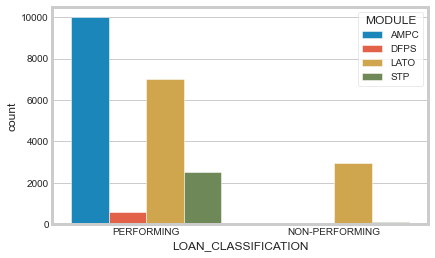

In [109]:
sns.set_style('whitegrid')
sns.countplot(data= loansApp, x='LOAN_CLASSIFICATION', hue='MODULE')  #Module doesn't seem to affect loan performance significantly so we can drop it

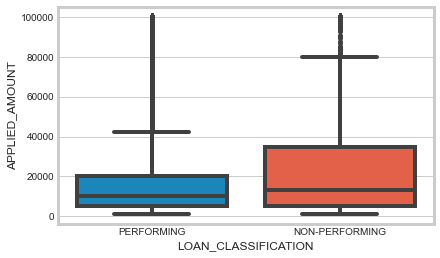

In [114]:
sns.boxplot(data = loansApp[loansApp['APPLIED_AMOUNT']<=100000], x='LOAN_CLASSIFICATION', y = 'APPLIED_AMOUNT')

In [115]:
def convert(col):
    
    if col == 'PERFORMING':
        return 1
    elif col == 'NON_PERFORMING':
        return 0
    
loansApp['LoanClass'] = loansApp['LOAN_CLASSIFICATION'].apply(convert)

In [116]:
loansApp

,CUSTOMER_UNIQUE_ID,OFFERID,INCR_ALLOWED,APPLIED_AMOUNT,DATE_OF_APPLY,APPLICATION_STATUS,MODULE,LOAN_CLASSIFICATION,LoanClass
0,562966000,099AMPC173040537,370803.43,1040.0,10/31/2017 10:36:23 AM,D,AMPC,PERFORMING,1.0
1,562966000,099AMPC173040537,370803.43,1040.0,10/31/2017 10:37:10 AM,D,AMPC,PERFORMING,1.0
2,562966000,099AMPC173040539,370803.43,1040.0,10/31/2017 10:39:06 AM,D,AMPC,PERFORMING,1.0
3,867156003,099AMPC173040543,15278.69,13000.0,10/31/2017 10:44:39 AM,D,AMPC,PERFORMING,1.0
4,747196003,099AMPC173040545,136863.90,1000.0,10/31/2017 10:44:58 AM,D,AMPC,PERFORMING,1.0
...,...,...,...,...,...,...,...,...,...
23167,212922009,099STPL19294000G,76659.00,389000.0,10/21/2019 6:03:09 PM,D,STP,PERFORMING,1.0
23168,422330002,099STPL1929403V3,33229.51,10000.0,10/21/2019 7:08:40 AM,D,STP,PERFORMING,1.0
23169,334578018,099STPL193010006,98616.43,400000.0,10/26/2019 9:44:13 AM,D,STP,PERFORMING,1.0
23170,440170019,099STPL19301000D,67800.03,344000.0,10/27/2019 11:34:56 AM,D,STP,PERFORMING,1.0


In [117]:
                    ###    Getting all the information we need from the loans application table     ###

loansAppNew = loansApp.groupby("CUSTOMER_UNIQUE_ID").mean()
loansAppNew = loansAppNew[['APPLIED_AMOUNT', 'LoanClass']]
loansAppNew['LoanRating'] = loansAppNew['APPLIED_AMOUNT'].apply(balance_rating)
LoanProfile = loansAppNew[['LoanRating']]
LoanProfile

,LoanRating
CUSTOMER_UNIQUE_ID,
56000,6
62005,6
104008,8
175007,6
200006,7
...,...
999737005,5
999823007,6
999881002,8


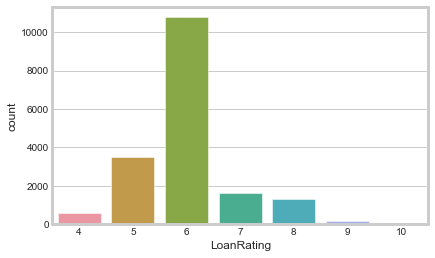

In [119]:
sns.set_style('whitegrid')
sns.countplot(data= loansAppNew, x='LoanRating') #explore target variables


***Joining all the different tables together to form one dataframe for further analysis.

In [118]:
#debtProfile
DebtProfileRatingDF = AccountsRating.join(debtProfile, on="CUSTOMER_UNIQUE_ID", how='inner')
DebtProfileRatingDF

,rated_bal,DebtRating
CUSTOMER_UNIQUE_ID,,
104008,6,10
710019,8,9
790019,4,10
983000,0,10
1254006,10,10
...,...,...
997060003,6,10
997183008,4,10
997801001,4,10


In [120]:
DebtProfileRatingDF = DebtProfileRatingDF.join(BalanceRating, on="CUSTOMER_UNIQUE_ID", how='left')
DebtProfileRatingDF

,rated_bal,DebtRating,mean_balance_rated,max_balance_rated,balance_history_rated
CUSTOMER_UNIQUE_ID,,,,,
104008,6,10,6,8,10
710019,8,9,9,10,10
790019,4,10,6,7,8
983000,0,10,6,9,10
1254006,10,10,10,10,10
...,...,...,...,...,...
997060003,6,10,6,6,8
997183008,4,10,5,6,6
997801001,4,10,5,6,8


In [121]:
DebtProfileRatingDF = DebtProfileRatingDF.join(CreditProfile, on="CUSTOMER_UNIQUE_ID", how='inner')
DebtProfileRatingDF

,rated_bal,DebtRating,mean_balance_rated,max_balance_rated,balance_history_rated,AmountRating,TenureRating
CUSTOMER_UNIQUE_ID,,,,,,,
104008,6,10,6,8,10,10,10
710019,8,9,9,10,10,10,10
790019,4,10,6,7,8,8,10
983000,0,10,6,9,10,10,10
1254006,10,10,10,10,10,8,10
...,...,...,...,...,...,...,...
997060003,6,10,6,6,8,8,10
997183008,4,10,5,6,6,7,10
997801001,4,10,5,6,8,7,6


In [122]:
DebtProfileRatingDF = DebtProfileRatingDF.join(LoanProfile, on="CUSTOMER_UNIQUE_ID", how='inner')
DebtProfileRatingDF

,rated_bal,DebtRating,mean_balance_rated,max_balance_rated,balance_history_rated,AmountRating,TenureRating,LoanRating
CUSTOMER_UNIQUE_ID,,,,,,,,
104008,6,10,6,8,10,10,10,8
710019,8,9,9,10,10,10,10,8
790019,4,10,6,7,8,8,10,6
983000,0,10,6,9,10,10,10,6
1254006,10,10,10,10,10,8,10,6
...,...,...,...,...,...,...,...,...
997060003,6,10,6,6,8,8,10,5
997183008,4,10,5,6,6,7,10,5
997801001,4,10,5,6,8,7,6,6


In [123]:
DebtProfileRatingDF['CreditScore'] = 10 * DebtProfileRatingDF.sum (axis=1)

In [124]:
###This table rates each customer based on the different rated factors
DebtProfileRatingDF

,rated_bal,DebtRating,mean_balance_rated,max_balance_rated,balance_history_rated,AmountRating,TenureRating,LoanRating,CreditScore
CUSTOMER_UNIQUE_ID,,,,,,,,,
104008,6,10,6,8,10,10,10,8,680
710019,8,9,9,10,10,10,10,8,740
790019,4,10,6,7,8,8,10,6,590
983000,0,10,6,9,10,10,10,6,610
1254006,10,10,10,10,10,8,10,6,740
...,...,...,...,...,...,...,...,...,...
997060003,6,10,6,6,8,8,10,5,590
997183008,4,10,5,6,6,7,10,5,530
997801001,4,10,5,6,8,7,6,6,520


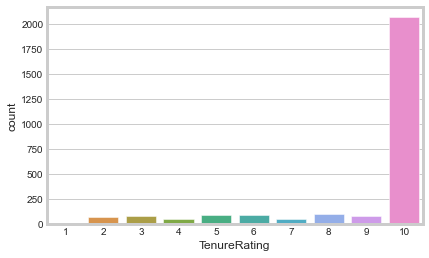

In [126]:
sns.set_style('whitegrid')
sns.countplot(data= DebtProfileRatingDF, x='TenureRating') #explore target variables


Checking for null values

In [128]:
demographics = pd.read_csv("all_demographics.csv", header=0, sep="|")

In [129]:
demographics.head()

,CUSTOMER_UNIQUE_ID,CUSTOMER_TYPE,ADDRESS_LINE3,ADDRESS_LINE4,COUNTRY,NATIONALITY,LANGUAGE,EXPOSURE_COUNTRY,LOCAL_BRANCH,FROZEN,...,SALARY,OTHER_INCOME,RENT,INSURANCE,LOAN_PAYMENT,OTHER_EXPENSES,HOUSE_VALUE,CREDIT_CARDS,E_COUNTRY,CCY_PERS_INCEXP
0,18030000,I,", IKOYI",LAGOS,NG,NG,ENG,NG,3,N,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,33020001,I,", IKORODU",LAGOS,NG,NG,ENG,NG,6,N,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,69090004,I,Lagos State,", VICTORIA ISLAND",NG,NG,ENG,NG,14,N,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,81010006,I,"SHAGAMU ROAD, IKORODU",LAGOS,NG,NG,ENG,NG,6,N,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,71120007,I,", SURULERE",LAGOS,NG,NG,ENG,NG,4,N,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [130]:
demographics = demographics[['CUSTOMER_UNIQUE_ID','LOCAL_BRANCH','SEX', 'MARITAL_STATUS']]#pick only the useful columns

Machine Learning and Prediction

In [28]:
                    #####     Importing some important libraries     #####


import matplotlib.pyplot as plt
%matplotlib inline
plt.style.use('fivethirtyeight')
import seaborn as sns
import sklearn
from sklearn.model_selection import train_test_split
from sklearn import tree
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import accuracy_score
from sklearn import manifold
from sklearn.manifold import TSNE
import matplotlib.patches as mpatches
from sklearn.naive_bayes import GaussianNB
import math
import statistics
import scipy

Seeing that there is only the "all_loan_application" table that contains the parameters for loan classification. And according to the International Monetary Fund(IMF), __A PERFORMING LOAN__ is any loan which: interest and principal payments are less than 90 days overdue, less than 90 days' worth of interest has been refinanced, capitalized or delayed by agreement; and continued payment is anticipated. We also have seen that the "all_bureau" table contains loans that are 30days, 60days and 90days past their due dates.


But in predicting whether or not a loan is classified as either performing or not, we want to redefine the problem statement in order to give us a clear understanding of what we want to set out to do.


Our aim now is to use a data table that was obtained from an R-Script that has similar information as on our credit score data table here to do the prediction for our loan classification prediction. This is because we want to look at the problem statement as "Predicting whether a Customer will end up having a Performing Loan status or a Non Performing Loan status". In other words, we are trying to predict if a customer will default with their loan repayment or not, and we want to do that with the same data we have in hand, but with a lot more obervations.

In [3]:
dflc = pd.read_csv('df.csv')

In [4]:
df

,Unnamed: 0,CUSTOMER_UNIQUE_ID,BALANCE_RATING,HIGHEST_BALANCE_RATING,BALANCE_HISTORY_RATING,history_Rating,loanHistory_Rating,Balance_Rating,Debt_Rating,CUSTOMER_CATEGORY,MINOR,MARITAL_STATUS,DEPENDENT_OTHERS,SEX,LOAN_CLASSIFICATION,NEW_LOAN_RATING,TOTAL_SCORE,TOTAL_POSSIBLE_SCORE,CREDIT_SCORE_PERCENT,MINIMUM_PERCENT_SCORE
0,1,10014006.0,8,8,10,4,5,8,1,1,1,1,1,1,1,6,55,130,42,50
1,2,100323005.0,4,8,10,6,6,0,10,1,1,1,1,1,1,6,55,130,42,50
2,3,100426005.0,4,8,10,4,5,6,1,1,1,1,1,1,0,8,51,130,39,50
3,4,100454005.0,6,7,10,4,5,6,1,1,1,1,1,1,1,5,49,130,38,50
4,5,100625004.0,4,10,10,5,5,0,10,1,1,1,1,1,1,5,54,130,42,50
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
128911,128912,NaN,1,1,1,1,1,1,1,7,10,10,10,7,1,1,52,130,40,50
128912,128913,NaN,1,1,1,1,1,1,1,7,10,8,1,7,1,1,41,130,32,50
128913,128914,NaN,1,1,1,1,1,1,1,7,10,8,10,7,1,1,50,130,38,50
128914,128915,NaN,1,1,1,1,1,1,1,7,10,10,1,7,1,1,43,130,33,50


In [132]:
dflc.drop('Unnamed: 0', axis =1)

,CUSTOMER_UNIQUE_ID,BALANCE_RATING,HIGHEST_BALANCE_RATING,BALANCE_HISTORY_RATING,history_Rating,loanHistory_Rating,Balance_Rating,Debt_Rating,CUSTOMER_CATEGORY,MINOR,MARITAL_STATUS,DEPENDENT_OTHERS,SEX,LOAN_CLASSIFICATION,NEW_LOAN_RATING,TOTAL_SCORE,TOTAL_POSSIBLE_SCORE,CREDIT_SCORE_PERCENT,MINIMUM_PERCENT_SCORE
0,10014006.0,8,8,10,4,5,8,1,1,1,1,1,1,1,6,55,130,42,50
1,100323005.0,4,8,10,6,6,0,10,1,1,1,1,1,1,6,55,130,42,50
2,100426005.0,4,8,10,4,5,6,1,1,1,1,1,1,0,8,51,130,39,50
3,100454005.0,6,7,10,4,5,6,1,1,1,1,1,1,1,5,49,130,38,50
4,100625004.0,4,10,10,5,5,0,10,1,1,1,1,1,1,5,54,130,42,50
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
128911,NaN,1,1,1,1,1,1,1,7,10,10,10,7,1,1,52,130,40,50
128912,NaN,1,1,1,1,1,1,1,7,10,8,1,7,1,1,41,130,32,50
128913,NaN,1,1,1,1,1,1,1,7,10,8,10,7,1,1,50,130,38,50
128914,NaN,1,1,1,1,1,1,1,7,10,10,1,7,1,1,43,130,33,50


In [133]:
def conv_perf(col):
    
    if col == 1:
        return 'PERFORMING'
    elif col == 0:
        return 'NON_PERFORMING'
    
dflc['performance'] = dflc['LOAN_CLASSIFICATION'].apply(conv_perf)

In [139]:
def conv_sex(col):
    
    if col == 7:
        return 'MALE'
    elif col == 10:
        return 'FEMALE'
    else:
        return 'NA'
    
dflc['sex_cat'] = dflc['SEX'].apply(conv_sex)

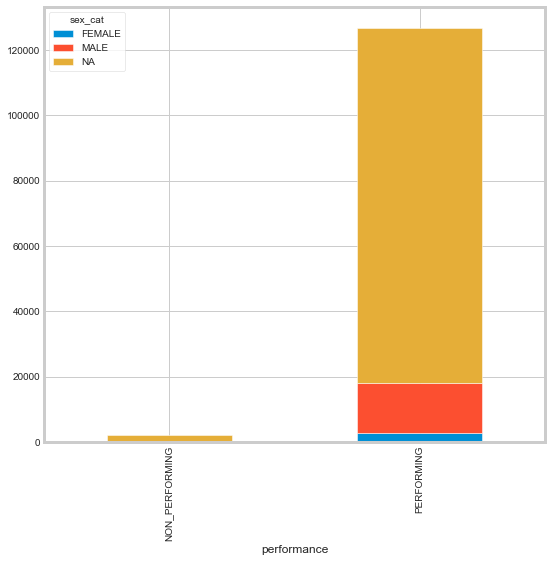

In [140]:
clarity_color_table = pd.crosstab(index = dflc['performance'], columns = dflc['sex_cat'])
clarity_color_table.plot(kind = "bar", figsize = (8,8), stacked =True)

In [141]:
def conv_mar(col):
    
    if col == 10:
        return 'SINGLE'
    elif col == 8:
        return 'MARRIED'
    elif col == 5:
        return 'DIVORCED'
    else:
        return 'NA'
    
dflc['mar_cat'] = dflc['MARITAL_STATUS'].apply(conv_mar)

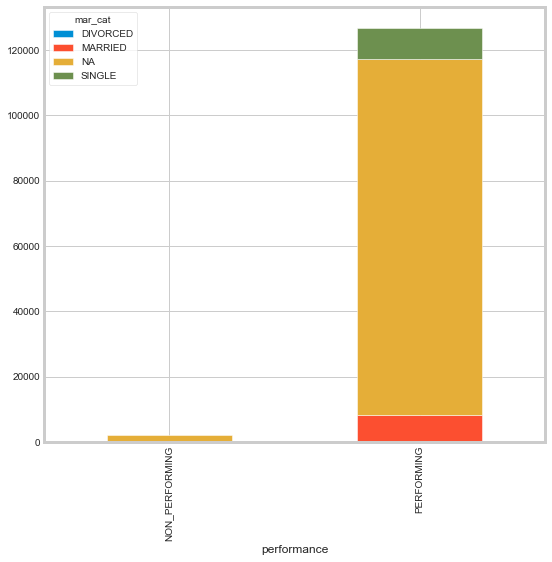

In [143]:
clarity_color_table = pd.crosstab(index = dflc['performance'], columns = dflc['mar_cat'])
clarity_color_table.plot(kind = "bar", figsize = (8,8), stacked =True)

This plot shows the number of Non Perfoming loans as compared to the number of Performing loans after all loans application and bureau statistics have been brought together.


[]

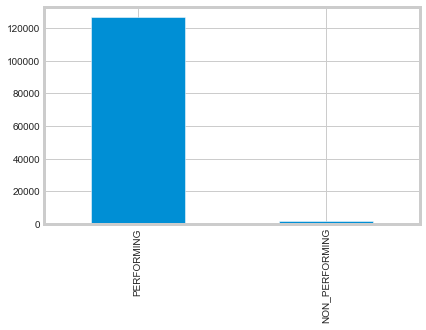

In [136]:
print("This plot shows the number of Non Perfoming loans as compared to the number of Performing loans after all loans application and bureau statistics have been brought together.")
dflc['performance'].value_counts().plot.bar()
plt.plot()

Splitting the data into Train and Test sets. Setting the train set to contain 70% of the dataset and the test set to contain 30% of the dataset.

In [162]:
dflc.drop(['performance', 'sex_cat', 'mar_cat'], axis =1, inplace = True)

In [163]:
spl = np.random.rand(len(dflc)) <= 0.70
train = dflc[spl]
test = dflc[~spl]
print('Train Shape: {}\nTest Shape: {}'.format(train.shape, test.shape))

Train Shape: (90084, 20)
Test Shape: (38832, 20)


Reset the indexing of both the train and test sets

In [164]:
train.reset_index(drop=True, inplace=True)
test.reset_index(drop=True, inplace=True)

Trying to look for a balance for our data set, since the cases of Non-Performing loans are way smaller than the Performing cases. I will randomly try to select an equal amount of Performing and Non Performing cases.

First we find the number of Non-Performing Cases in our train data dataset.

In [165]:
NonCount = train['LOAN_CLASSIFICATION'].value_counts()[0]
print('The train dataset has {} non-performing loans.'.format(NonCount))

The train dataset has 1480 non-performing loans.


In [166]:
NonPerform = train[train['LOAN_CLASSIFICATION'] == 0]
Perform = train[train['LOAN_CLASSIFICATION'] == 1]
Perform.head()

,Unnamed: 0,CUSTOMER_UNIQUE_ID,BALANCE_RATING,HIGHEST_BALANCE_RATING,BALANCE_HISTORY_RATING,history_Rating,loanHistory_Rating,Balance_Rating,Debt_Rating,CUSTOMER_CATEGORY,MINOR,MARITAL_STATUS,DEPENDENT_OTHERS,SEX,LOAN_CLASSIFICATION,NEW_LOAN_RATING,TOTAL_SCORE,TOTAL_POSSIBLE_SCORE,CREDIT_SCORE_PERCENT,MINIMUM_PERCENT_SCORE
0,1,10014006.0,8,8,10,4,5,8,1,1,1,1,1,1,1,6,55,130,42,50
2,4,100454005.0,6,7,10,4,5,6,1,1,1,1,1,1,1,5,49,130,38,50
3,5,100625004.0,4,10,10,5,5,0,10,1,1,1,1,1,1,5,54,130,42,50
4,6,10077005.0,6,8,10,4,6,0,1,1,1,1,1,1,1,7,47,130,36,50
5,8,100894008.0,4,6,7,6,6,0,10,1,1,1,1,1,1,6,50,130,38,50


In [167]:
train.LOAN_CLASSIFICATION.value_counts()

1    88604
0     1480
Name: LOAN_CLASSIFICATION, dtype: int64

In [168]:
RS = Perform.sample(NonCount)
RS.head()

,Unnamed: 0,CUSTOMER_UNIQUE_ID,BALANCE_RATING,HIGHEST_BALANCE_RATING,BALANCE_HISTORY_RATING,history_Rating,loanHistory_Rating,Balance_Rating,Debt_Rating,CUSTOMER_CATEGORY,MINOR,MARITAL_STATUS,DEPENDENT_OTHERS,SEX,LOAN_CLASSIFICATION,NEW_LOAN_RATING,TOTAL_SCORE,TOTAL_POSSIBLE_SCORE,CREDIT_SCORE_PERCENT,MINIMUM_PERCENT_SCORE
14729,21036,134247004.0,1,1,1,1,1,1,0,1,1,1,1,1,1,1,12,130,9,50
85959,122936,NaN,1,1,1,1,1,1,1,7,10,8,10,7,1,1,50,130,38,50
9020,12886,694823007.0,4,6,8,4,5,0,1,1,1,1,1,1,1,6,39,130,30,50
34162,48780,385156009.0,1,1,1,1,1,1,0,1,1,1,1,1,1,1,12,130,9,50
86554,123788,NaN,1,1,1,1,1,1,1,7,10,8,10,7,1,1,50,130,38,50


Joining both the Nonperforming and RS dataframes together

In [169]:
setSample = pd.concat([NonPerform, RS])

In [170]:
len(setSample)

2960

In [171]:
setSample.head(10)

,Unnamed: 0,CUSTOMER_UNIQUE_ID,BALANCE_RATING,HIGHEST_BALANCE_RATING,BALANCE_HISTORY_RATING,history_Rating,loanHistory_Rating,Balance_Rating,Debt_Rating,CUSTOMER_CATEGORY,MINOR,MARITAL_STATUS,DEPENDENT_OTHERS,SEX,LOAN_CLASSIFICATION,NEW_LOAN_RATING,TOTAL_SCORE,TOTAL_POSSIBLE_SCORE,CREDIT_SCORE_PERCENT,MINIMUM_PERCENT_SCORE
1,3,100426005.0,4,8,10,4,5,6,1,1,1,1,1,1,0,8,51,130,39,50
17,29,102546001.0,5,8,8,4,5,0,1,1,1,1,1,1,0,7,43,130,33,50
40,62,10517001.0,4,8,10,4,6,0,1,1,1,1,1,1,0,7,45,130,35,50
44,68,10568001.0,4,8,10,4,6,0,1,1,1,1,1,1,0,7,45,130,35,50
48,73,105841001.0,4,9,10,6,6,6,1,1,1,1,1,1,0,6,53,130,41,50
50,75,10589002.0,4,9,10,4,5,6,1,1,1,1,1,1,0,7,51,130,39,50
57,87,1071017.0,4,9,10,4,6,0,1,1,1,1,1,1,0,8,47,130,36,50
77,118,109569009.0,4,8,10,4,5,0,1,1,1,1,1,1,0,5,42,130,32,50
81,124,109969007.0,6,10,10,4,6,0,1,1,1,1,1,1,0,8,50,130,38,50
87,138,110648004.0,4,7,8,4,5,6,1,1,1,1,1,1,0,5,45,130,35,50


Removing outliers

In [172]:
q1 = setSample.quantile(0.25)
q3 = setSample.quantile(0.75)
IQR = q3 - q1

dt = setSample[~((setSample < (q1 - 2.5 * IQR)) |(setSample > (q3 + 2.5 * IQR))).any(axis=1)]

In [173]:
lenAfter = len(dt)
lenBefore = len(setSample)
lenDifference = len(setSample) - len(dt)

print('Our data size has been reduced from {} transaction by {} transactions. Now we have {} transactions. All outliers above and below the median or average loan value has been removed.'.format(lenBefore, lenDifference, lenAfter))

Our data size has been reduced from 2960 transaction by 517 transactions. Now we have 2443 transactions. All outliers above and below the median or average loan value has been removed.


**Taking a look at correlation of the new set sample

In [174]:
corr = dt.corr()
corr = corr[['LOAN_CLASSIFICATION']]
corr

,LOAN_CLASSIFICATION
Unnamed: 0,0.750699
CUSTOMER_UNIQUE_ID,-0.120795
BALANCE_RATING,-0.828582
HIGHEST_BALANCE_RATING,-0.856801
BALANCE_HISTORY_RATING,-0.859072
history_Rating,-0.804384
loanHistory_Rating,-0.850584
Balance_Rating,0.896566
Debt_Rating,0.747531
CUSTOMER_CATEGORY,NaN


In [175]:
#Correlation greater than 0.5, that is positive correlation
corr[corr['LOAN_CLASSIFICATION'] > 0.5]

,LOAN_CLASSIFICATION
Unnamed: 0,0.750699
Balance_Rating,0.896566
Debt_Rating,0.747531
LOAN_CLASSIFICATION,1.000000


Visualising features with high positive correlation

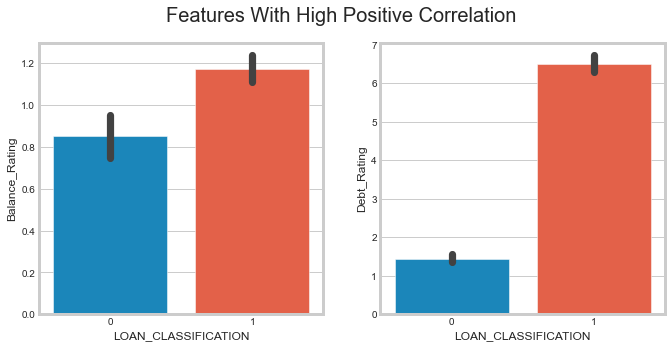

In [176]:
f, axes = plt.subplots(nrows=1, ncols=2, figsize=(10,5))

f.suptitle('Features With High Positive Correlation', size=20)
sns.barplot(x="LOAN_CLASSIFICATION", y="Balance_Rating", data=setSample, ax=axes[0])
sns.barplot(x="LOAN_CLASSIFICATION", y="Debt_Rating", data=setSample, ax=axes[1])

In [177]:
#Correlation less than 0.5, that is positive correlation
corr[corr['LOAN_CLASSIFICATION'] < 0.5]

,LOAN_CLASSIFICATION
CUSTOMER_UNIQUE_ID,-0.120795
BALANCE_RATING,-0.828582
HIGHEST_BALANCE_RATING,-0.856801
BALANCE_HISTORY_RATING,-0.859072
history_Rating,-0.804384
loanHistory_Rating,-0.850584
NEW_LOAN_RATING,-0.854014
TOTAL_SCORE,-0.825528
CREDIT_SCORE_PERCENT,-0.825196


Visualising features with negative correlation

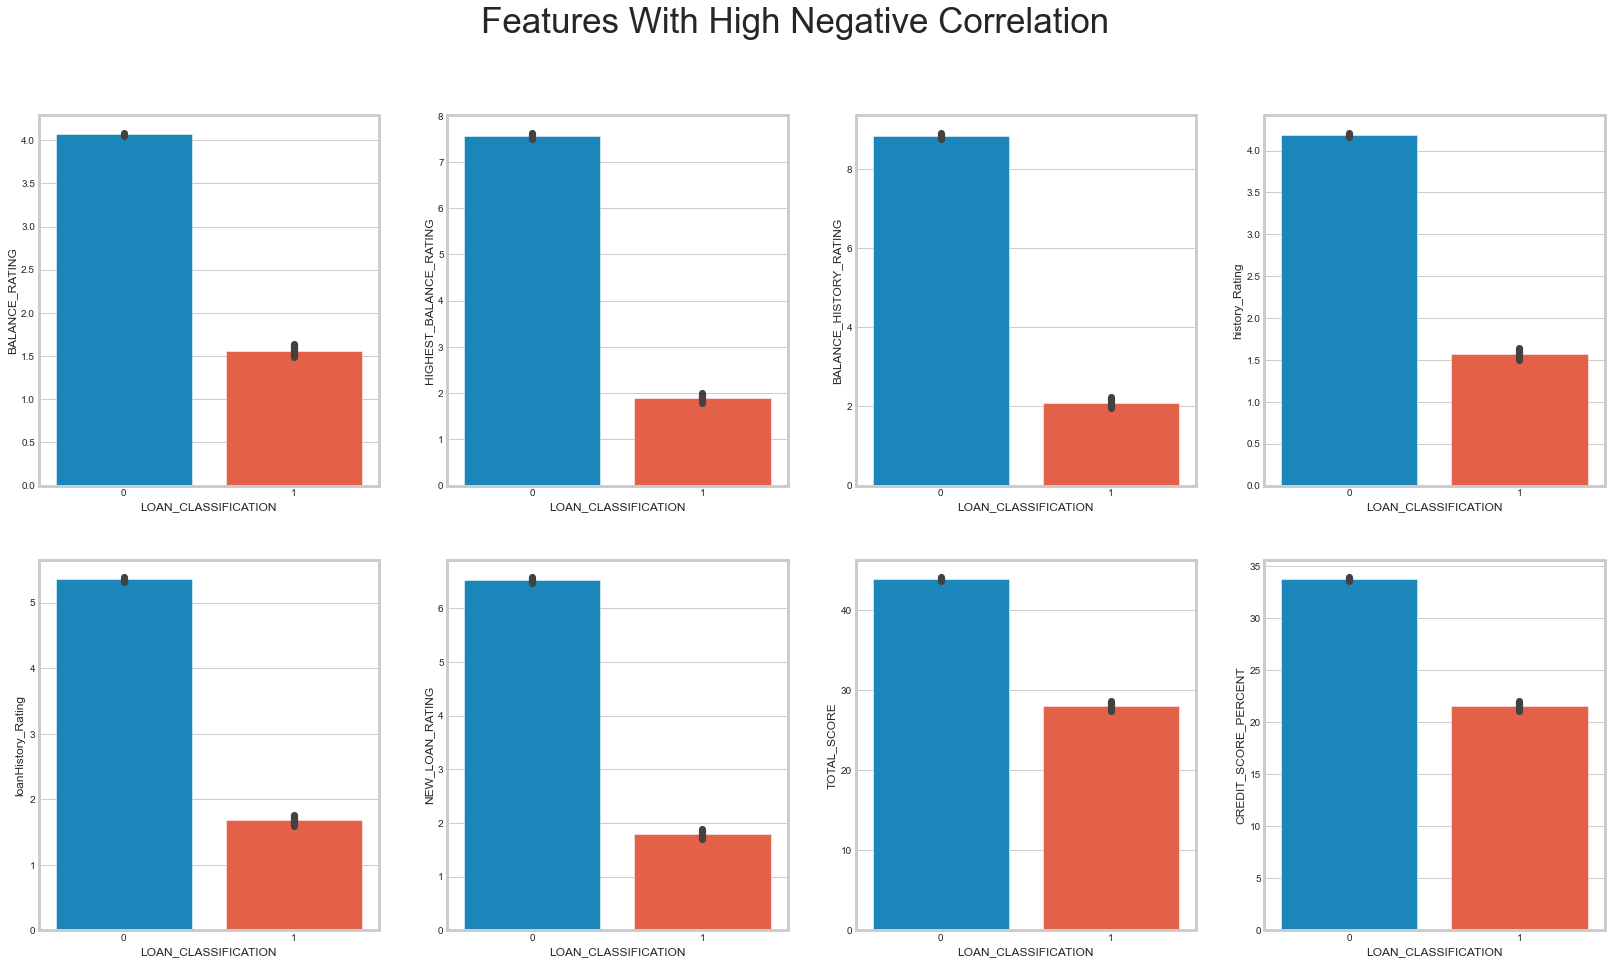

In [178]:
f, axes = plt.subplots(nrows=2, ncols=4, figsize=(25,15))

f.suptitle('Features With High Negative Correlation', size=35)
sns.barplot(x="LOAN_CLASSIFICATION", y="BALANCE_RATING", data=setSample, ax=axes[0,0])
sns.barplot(x="LOAN_CLASSIFICATION", y="HIGHEST_BALANCE_RATING", data=setSample, ax=axes[0,1])
sns.barplot(x="LOAN_CLASSIFICATION", y="BALANCE_HISTORY_RATING", data=setSample, ax=axes[0,2])
sns.barplot(x="LOAN_CLASSIFICATION", y="history_Rating", data=setSample, ax=axes[0,3])
sns.barplot(x="LOAN_CLASSIFICATION", y="loanHistory_Rating", data=setSample, ax=axes[1,0])
sns.barplot(x="LOAN_CLASSIFICATION", y="NEW_LOAN_RATING", data=setSample, ax=axes[1,1])
sns.barplot(x="LOAN_CLASSIFICATION", y="TOTAL_SCORE", data=setSample, ax=axes[1,2])
sns.barplot(x="LOAN_CLASSIFICATION", y="CREDIT_SCORE_PERCENT", data=setSample, ax=axes[1,3])
